Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In this notebook we will be evaluating the RandomForestRegressor algorithm. Random state will be set to 2. We will start with the default hyperparameters.

In [3]:
random_state = 2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = slidings.drop(columns='sliding',axis=1)
y= slidings['sliding']

model = RandomForestRegressor()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Evaluating the model with the default hyperparameters.

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6068
           1       0.84      0.72      0.77      3119

    accuracy                           0.86      9187
   macro avg       0.85      0.82      0.84      9187
weighted avg       0.86      0.86      0.86      9187



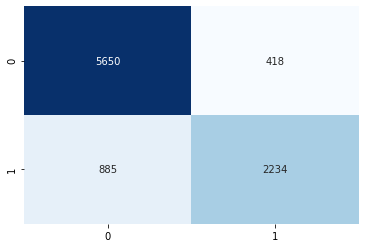

In [4]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
predictions = np.round(predictions,decimals=0)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

We will now variate the maximum depth and the number of estimators, and compare the precision of the model guessing there was a sliding(1) and the accuracy.

The maximum precision for  2  depth found was  1.000  with  30  estimators.
The maximum accuracy for  2  depth found was  0.869  with  5  estimators.

The maximum precision for  3  depth found was  0.950  with  20  estimators.
The maximum accuracy for  3  depth found was  0.871  with  10  estimators.

The maximum precision for  4  depth found was  0.954  with  5  estimators.
The maximum accuracy for  4  depth found was  0.872  with  5  estimators.

The maximum precision for  5  depth found was  0.954  with  5  estimators.
The maximum accuracy for  5  depth found was  0.872  with  5  estimators.

The maximum precision for  6  depth found was  0.955  with  5  estimators.
The maximum accuracy for  6  depth found was  0.872  with  90  estimators.

The maximum precision for  7  depth found was  0.956  with  40  estimators.
The maximum accuracy for  7  depth found was  0.872  with  80  estimators.



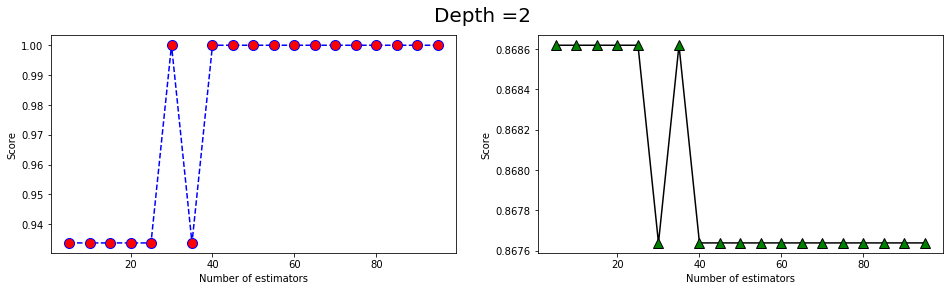

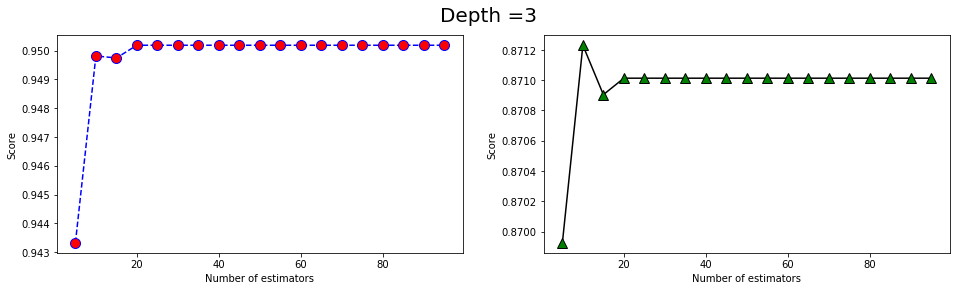

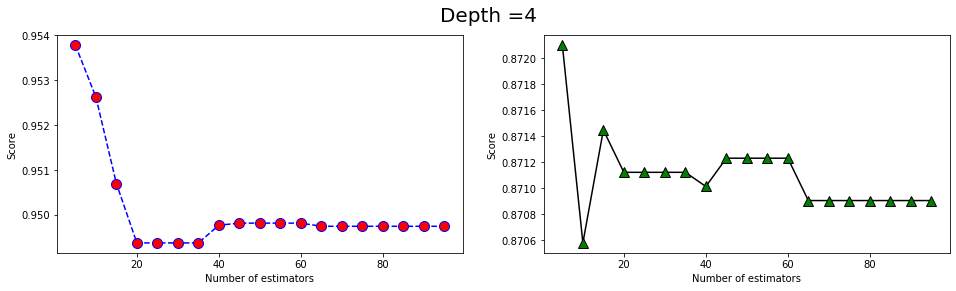

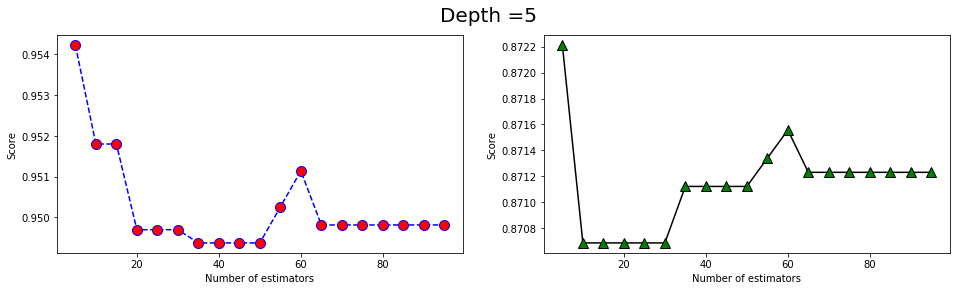

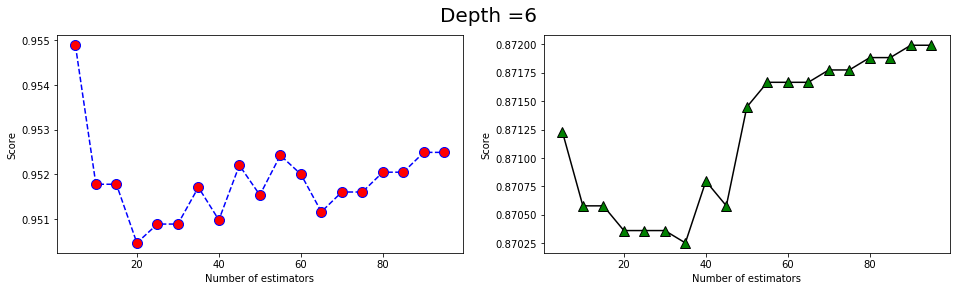

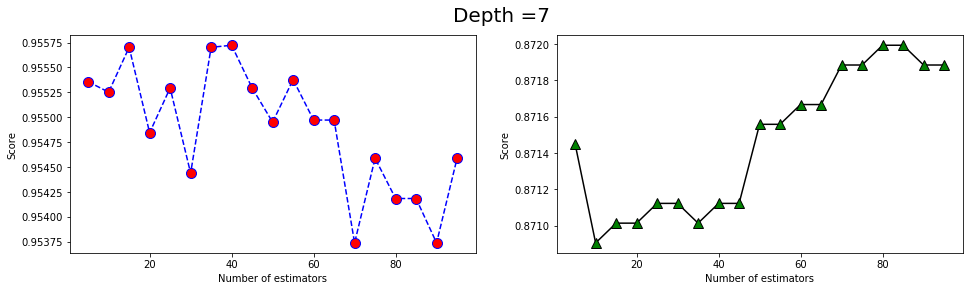

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,8):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestRegressor(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        predictions = np.round(predictions,decimals=0)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    



After depth 3 the variation for both the precision and accuracy is only on the third decimal case, so we will chose depth 3 and 10 estimators to take a more in-depth look since they seem to produce average values.

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6068
           1       0.95      0.66      0.78      3119

    accuracy                           0.87      9187
   macro avg       0.90      0.82      0.84      9187
weighted avg       0.88      0.87      0.86      9187



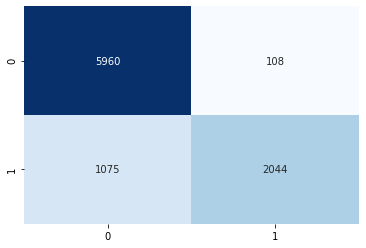

In [6]:
depth = 3
estimators=10
model = RandomForestRegressor(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = np.round(predictions,decimals=0)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [7]:
model.score(X,y)

0.5490548320390607

Validating with cross validation.

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores

array([0.48430083, 0.76511753, 0.42599659, 0.58557216, 0.27411691,
       0.91711221, 0.46720816, 0.07514316, 0.78324268, 0.48640883])

In [9]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.47)


In [10]:
scores_r2= cross_val_score(model, X, y, cv=10, scoring='r2')
scores_r2

array([0.48430083, 0.76511753, 0.42599659, 0.58557216, 0.27411691,
       0.91711221, 0.46720816, 0.07514316, 0.78324268, 0.48640883])

In [11]:
print("R2 Score: %0.2f (+/- %0.2f)" % (scores_r2.mean(), scores_r2.std() * 2))

R2 Score: 0.53 (+/- 0.47)


Taking a look at the Roc Curve and the area under the curve.

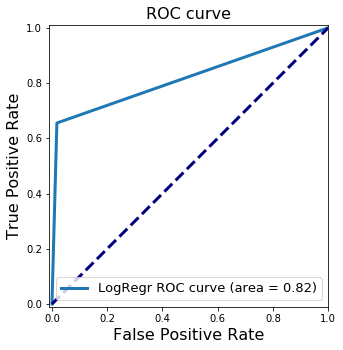

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

Finally we will at a look at how each feature affects our model.

In [13]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

situation 0.9472
location 0.0000
risk 0.0002
victims 0.0000
deadly_victims 0.0000
length 0.0003
num_points 0.0000
in_place 0.0002
Rain 0.0521


Like in the random forest classifier model, the situation feature weights too much, but in this model this particular relation is even more aggravated, so we will proceed with a more in-depth analysis of this feature with random forest classifier.